<a href="https://colab.research.google.com/github/sogand73/OCT-Classification/blob/main/representative_dictionary_learning_for_OCT_(Kermany_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning
from joblib import dump, load

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Data preparing for Dictionary Learning

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paultimothymooney/kermany2018/

In [ ]:
!unzip kermany2018.zip

In [ ]:
# @title Selection of some images as the dataset for dictionary learning (open and store)

In [4]:
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [5]:
!mkdir '/content/oct_my_dictl_dataset'


In [6]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [7]:
# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset/train/'
#dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
#for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:20]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")






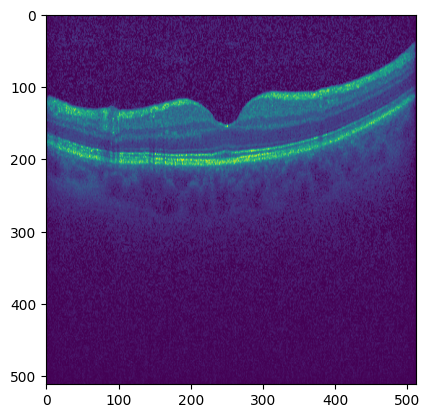

In [ ]:
plt.imshow(images[2])

In [ ]:
#@title dictionary Learning Processs

In [8]:
# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [9]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
#X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]
#X_NORMAL, X_DME, X_CNV = X[:10], X[10:20], X[20:30]
X_NORMAL, X_DME, X_CNV = X[:20], X[20:40], X[40:60]

In [10]:
# Create a dictionary learning model for NORMAL data
n_components = 10**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_NORMAL -= np.mean(X_NORMAL, axis=0)
X_NORMAL /= np.std(X_NORMAL, axis=0)

# Fit the model to the flattened NORMAL image data
dl_model_NORMAL.fit(X_NORMAL)
ATOMS_NORMAL = dl_model_NORMAL.components_
X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)

#save the model
dump(dl_model_NORMAL, '/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_NORMAL_10_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


['/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_NORMAL_10_60.joblib']

In [11]:
# Create a dictionary learning model for DME data
n_components = 10**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_DME = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_DME -= np.mean(X_DME, axis=0)
X_DME /= np.std(X_DME, axis=0)

# Fit the model to the flattened DME image data
dl_model_DME.fit(X_DME)
ATOMS_DME = dl_model_DME.components_
X_DME_tr = dl_model_DME.transform(X_DME)

#save the model
dump(dl_model_DME, '/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_DME_10_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


['/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_DME_10_60.joblib']

In [12]:
# Create a dictionary learning model for CNV data
n_components = 10**2  # Number of atoms in the dictionary (old:100)
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 60  # Number of iterations (old:100)

dl_model_CNV = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_CNV -= np.mean(X_CNV, axis=0)
X_CNV /= np.std(X_CNV, axis=0)

# Fit the model to the flattened CNV image data
dl_model_CNV.fit(X_CNV)
ATOMS_CNV = dl_model_CNV.components_
X_CNV_tr = dl_model_CNV.transform(X_CNV)

#save the model
dump(dl_model_CNV, '/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_CNV_10_60.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


['/content/drive/MyDrive/oct_classification/kermany_dataset/test17/dl_model_CNV_10_60.joblib']

In [13]:
!mkdir '/content/atoms'


In [14]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/atoms/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [15]:

#atoms save as an image
atoms_all = ATOMS_NORMAL
#for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_DRUSEN,'DRUSEN'], [ATOMS_CNV,'CNV']]:
for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_CNV,'CNV']]:
  for i in range(n_components):
    atoms_save = atom[0][i].reshape((512, 512))*255
    atoms_save = atoms_save.astype(np.uint8)
    destination_atom_folder = os.path.join('/content/atoms/', atom[1], str(i)+'.jpeg')
    cv2.imwrite(destination_atom_folder, atoms_save)

0.3
1.8129150520362522e-12


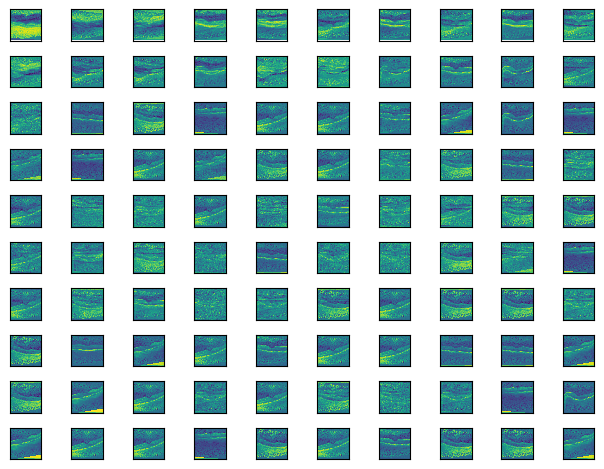

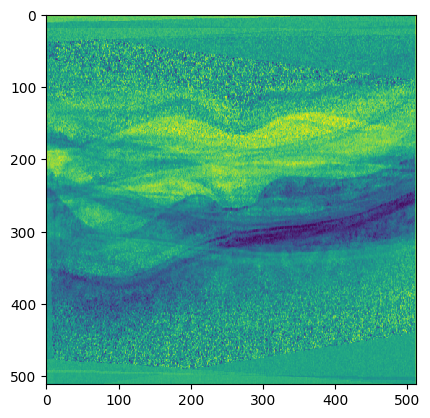

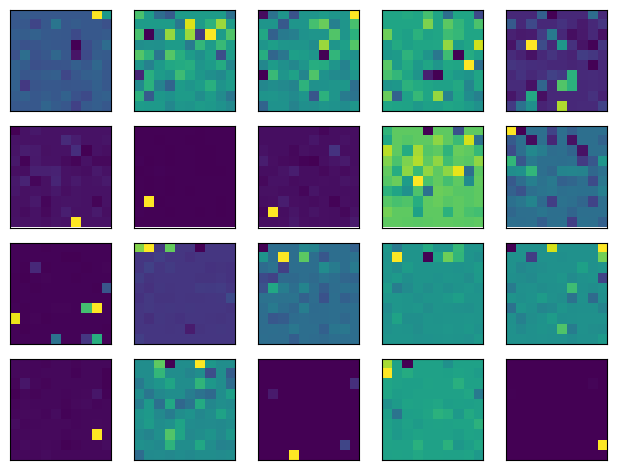

In [16]:
#NORMAL data

#Feature extraction percent
print(np.mean(X_NORMAL_tr == 0))
X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_
print(np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_NORMAL
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[10].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_NORMAL_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_NORMAL_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.3695
1.1068571854373066e-12


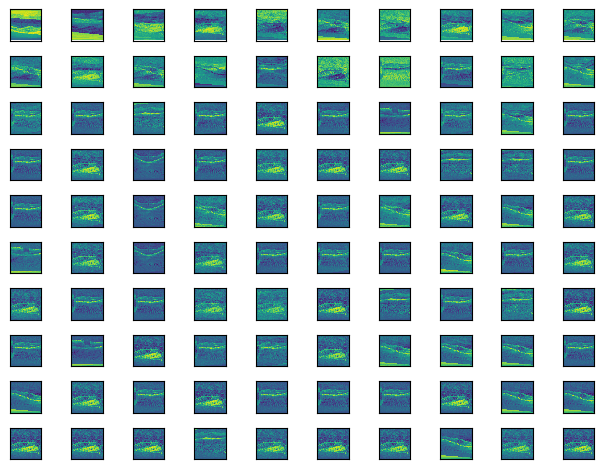

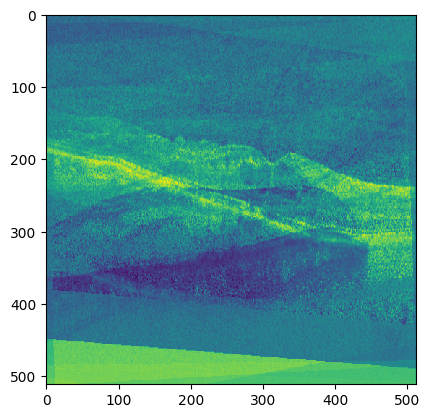

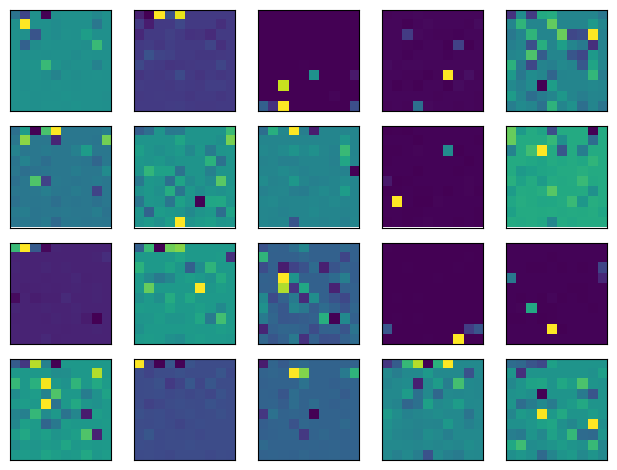

In [17]:
#DME data

#Feature extraction percent
print(np.mean(X_DME_tr == 0))
X_DME_hat = X_DME_tr @ dl_model_DME.components_
print(np.mean(np.sum((X_DME_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_DME
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[10].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_DME_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_DME_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.346
1.2830149698120892e-12


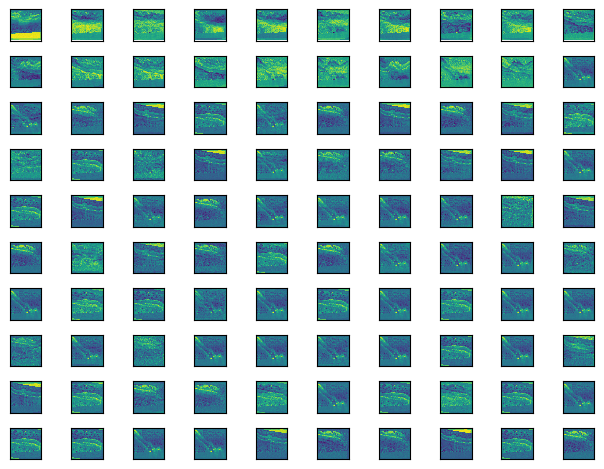

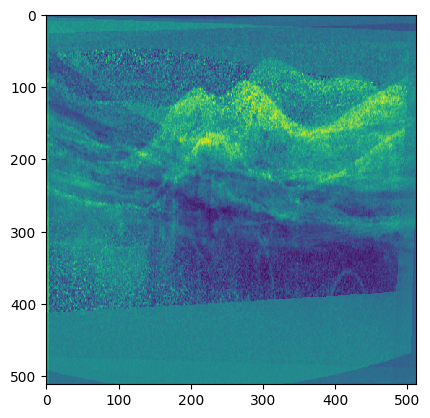

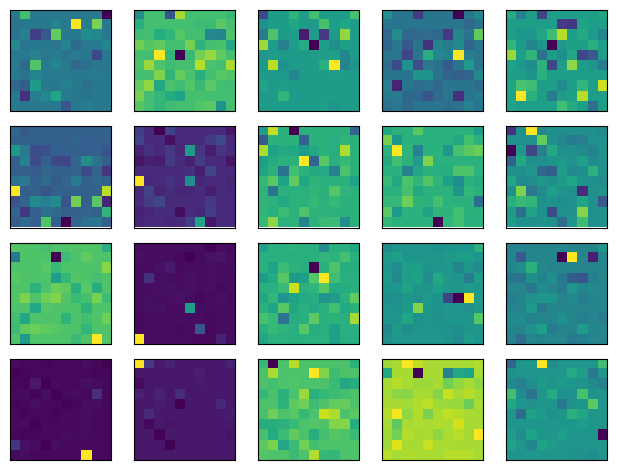

In [18]:
#CNV data

#Feature extraction percent
print(np.mean(X_CNV_tr == 0))
X_CNV_hat = X_CNV_tr @ dl_model_CNV.components_
print(np.mean(np.sum((X_CNV_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_CNV
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[10].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_CNV_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_CNV_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [ ]:
#@title Number of training iterations comparison

In [ ]:
sparsity1 = []
RE1 = []
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
  print(f'iteration {i} begins:')
  dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=i, verbose=True)
  dl_model_NORMAL.fit(X_NORMAL)

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL_iter' + f'{i}' + '.joblib')
  dump(dl_model_NORMAL, save_dir)

  #Feature extraction percent
  X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)
  X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_

  sparsity = np.mean(X_NORMAL_tr == 0)
  sparsity1.append(sparsity)
  re = np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))
  RE1.append(re)
  print(f'sparsity percentage: {sparsity}')
  print(f'RE: {re}')


# Plot the reconstruction error over iterations
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], RE1 + RE2, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Reconstruction Error')
plt.title('Convergence Analysis')
plt.show()

# Plot the reconstruction error over iterations
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], sparsity1 + sparsity2, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Sparsity Level')
plt.title('Convergence Analysis')
plt.show()



In [ ]:
#@title Number of learned atoms comparison

In [ ]:
n_components = [10**2, 12**2, 14**2, 16**2, 18**2, 20**2]  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations


for i in n_components:
  print(f'iteration {i} begins:')
  dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=i, alpha=alpha, batch_size=batch_size, n_iter=n_iter, verbose=True)
  dl_model_NORMAL.fit(X_NORMAL)

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL_atoms' + f'{i}' + '.joblib')
  dump(dl_model_NORMAL, save_dir)

  #Feature extraction percent
  X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)
  X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_

  sparsity = np.mean(X_NORMAL_tr == 0)
  sparsity3.append(sparsity)
  re = np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))
  RE3.append(re)
  print(f'sparsity percentage: {sparsity}')
  print(f'RE: {re}')


# Plot the reconstruction error over iterations
plt.plot([10**2, 12**2, 14**2, 16**2, 18**2, 20**2], RE3, marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Reconstruction Error')
plt.title('Convergence Analysis')
plt.show()

# Plot the reconstruction error over iterations
plt.plot([10**2, 12**2, 14**2, 16**2, 18**2, 20**2], sparsity3, marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Sparsity Level')
plt.title('Convergence Analysis')
plt.show()




In [ ]:
#copy file to google drive
!cp /content/drive/MyDrive/oct_classification/kermany_dataset/dl_model_NORMAL_atoms400.joblib /content/drive/MyDrive/oct_classification/kermany_dataset/test14_repeatability/


In [ ]:
#@title Classification using YOLOv8

In [ ]:
!pip install ultralytics

In [ ]:
shutil.rmtree('/content/oct_my_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dataset'

In [19]:
import os
!mkdir '/content/oct_my_dataset'
!mkdir '/content/oct_my_dataset/train'
!mkdir '/content/oct_my_dataset/test'
!mkdir '/content/oct_my_dataset/val'


In [20]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_dataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_dataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_dataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [21]:
import shutil


# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset'  # Replace with your source folder path
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/'  # Replace with your destination folder path

#for folder in [['train/',500], ['test/',100], ['val/',8]]
for folder in [['train/',600], ['test/',200]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            shutil.copy(source_path, destination_path)
            #print(f"Copied: {file_name}")


In [22]:
#Separate and store Val data from train data
# Define source and destination directories
dataset_folder = '/content/oct_my_dataset/train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/val/'  # Replace with your destination folder path



for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for num in range(500,600):
    file_name = files_to_copy[num]
    if file_name.endswith('.jpeg'):  # Specify the image file formats
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, subfolder) + '/'
        shutil.copy(source_path, destination_path)
        #print(f"Copied: {file_name}")

In [23]:
shutil.rmtree('/content/oct_my_trdataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_trdataset'

In [24]:
import os
!mkdir '/content/oct_my_trdataset'
!mkdir '/content/oct_my_trdataset/train'
!mkdir '/content/oct_my_trdataset/test'
!mkdir '/content/oct_my_dataset/val'

mkdir: cannot create directory ‘/content/oct_my_dataset/val’: File exists


In [25]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_trdataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_trdataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_trdataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [26]:
import shutil


# Define source and destination directories
dataset_folder = '/content/oct_my_dataset'
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_trdataset/'  # Replace with your destination folder path

img_train = []
img_test = []
img_val = []


#for folder in [['train/',500], ['test/',100]]:
for folder in [['train/',500], ['test/',200], ['val/',100]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            #shutil.copy(source_path, destination_path)
            img = Image.open(source_path) # This returns an image object
            #print(img.mode)
            #img = img.convert('RGB')
            img = np.asarray(img) # convert it to ndarray
            img = cv2.resize(img, (512, 512))
            img = img.reshape((1, 512 * 512))
            img = img.astype(float)
            img /= 255.0

            # #Normalized data
            #img -= np.mean(img, axis=0)
            #img /= np.std(img, axis=0)


            if subfolder == 'NORMAL':
              img_tr = dl_model_NORMAL.transform(img)
            elif subfolder == 'DME':
              img_tr = dl_model_DME.transform(img)
            #elif subfolder == 'DRUSEN':
              #img_tr = dl_model_DRUSEN.transform(img)
            elif subfolder == 'CNV':
              img_tr = dl_model_CNV.transform(img)



            img_tr2d = img_tr.reshape((10, 10))*255
            img_tr2d = img_tr2d.astype(np.uint8)

            # Save the image to the specified directory
            save_destination = os.path.join(destination_path, file_name)
            #image_to_save.save(save_destination)
            cv2.imwrite(save_destination, img_tr2d)

            if folder[0] == 'train/':
              img_train.append(img_tr2d)
            elif folder[0] == 'test/':
              img_test.append(img_tr2d)
            elif folder[0] == 'val/':
              img_val.append(img_tr2d)


            #images.append(img_tr2d)
            #print(f"Copied: {file_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the di

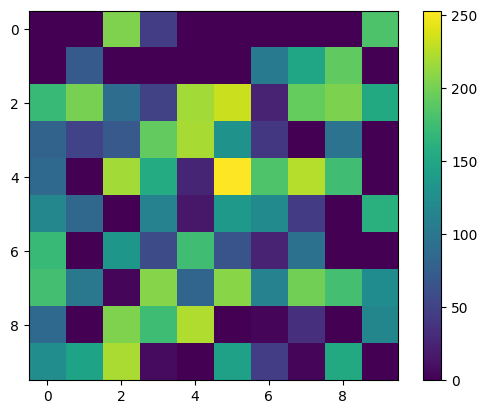

In [27]:
plt.imshow(img_tr2d.reshape((10, 10)), interpolation='nearest')
plt.colorbar()

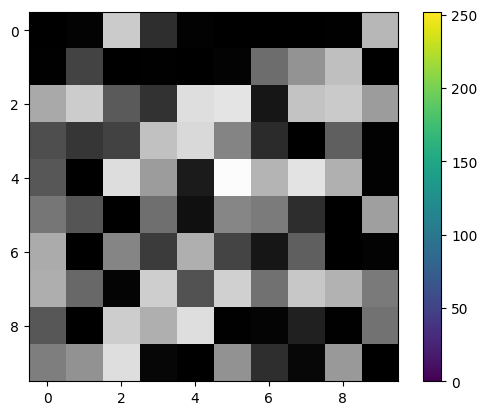

In [28]:
#save_destination = '/content/CNV-172472-132 (1).jpeg'
c = cv2.imread(save_destination)
plt.imshow(c, interpolation='nearest')
plt.colorbar()

In [29]:
from ultralytics import YOLO

# Load a model

#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
#model = YOLO('/content/best.pt') #Load the initial weights, gained from the former model training on this data (previous line)

model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/oct_my_trdataset', epochs=100, imgsz=10, batch=64)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 69.9MB/s]


YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/oct_my_trdataset, epochs=100, time=None, patience=50, batch=64, imgsz=10, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning /content/oct_my_trdataset/train... 1500 images, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 4043.55it/s]

train: New cache created: /content/oct_my_trdataset/train.cache



val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 4275.79it/s]

val: New cache created: /content/oct_my_trdataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G      1.294         64         32:  12%|█▎        | 3/24 [00:01<00:10,  2.10it/s]

      1/100         0G      1.268         64         32:  25%|██▌       | 6/24 [00:02<00:07,  2.37it/s]
100%|██████████| 755k/755k [00:00<00:00, 8.15MB/s]
      1/100         0G      1.308         28         32: 100%|██████████| 24/24 [00:08<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]

                   all       0.33          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G      1.266         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all      0.377          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G      1.214         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all      0.443          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G      1.209         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


                   all      0.447          1

      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G      1.207         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]

                   all      0.443          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G       1.13         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all      0.457          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G      1.129         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all      0.503          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G      1.105         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all       0.45          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G      1.062         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G      1.086         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all      0.557          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G       1.05         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]

                   all      0.593          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G      1.054         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all      0.637          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G      1.008         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G      0.978         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all      0.657          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G     0.9468         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all      0.707          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G     0.9465         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]


                   all      0.713          1

      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G     0.9158         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G     0.9148         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G     0.9358         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G     0.9095         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all       0.77          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G     0.8855         28         32: 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G     0.9225         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G     0.8633         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G     0.8577         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G     0.8303         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G     0.8254         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G     0.8032         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G     0.7704         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G     0.7664         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G     0.7851         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G     0.7834         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G     0.7412         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G     0.7587         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G     0.7403         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all      0.887          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G     0.7624         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G     0.7234         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]


                   all       0.92          1

      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G     0.7561         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G     0.7262         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G     0.6965         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.01it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G     0.6868         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G     0.7253         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G     0.6888         28         32: 100%|██████████| 24/24 [00:08<00:00,  2.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.94it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G     0.6843         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G     0.6784         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G      0.659         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G     0.6439         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G     0.6769         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G     0.6616         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G     0.6856         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G     0.6699         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G     0.6597         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G     0.6704         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G     0.6206         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G     0.6502         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all      0.957          1

      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G     0.6747         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G     0.6155         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G     0.6423         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G      0.608         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G     0.6182         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G     0.6348         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G     0.6317         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G       0.63         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G     0.6251         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G      0.609         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.16it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G     0.5876         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G     0.6347         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G     0.6254         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G     0.6108         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G     0.5666         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G     0.5916         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G     0.6198         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G     0.6039         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G     0.5916         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G     0.6009         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G     0.5646         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G     0.6057         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G     0.5629         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G     0.5841         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G     0.5313         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.89it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G      0.556         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G     0.5755         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G      0.594         28         32: 100%|██████████| 24/24 [00:10<00:00,  2.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G     0.5793         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G     0.5901         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G     0.5598         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G     0.5759         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G     0.5579         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G     0.5905         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G     0.5507         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.64it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G     0.5512         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G     0.5608         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G     0.5561         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G      0.574         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G     0.5448         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G     0.5759         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G      0.601         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G      0.547         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G     0.5625         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G     0.5441         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G     0.5739         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all       0.96          1



100 epochs completed in 0.206 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


                   all      0.967          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [30]:
# Validate the modelblob:https://colab.research.google.com/f8428635-acf6-400f-b52f-379198002792
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


                   all      0.967          1
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


0.9666666388511658

In [ ]:
# @title Predict using the model



In [31]:
#test_score = model.predict(source='/content/oct_my_trdataset/test/Normal')
#0:AMD 1:DME 2:Normal
label_predict = []
label_conf = []
label_true = []

test_path = '/content/oct_my_trdataset/test/'

for subfolder in ['NORMAL', 'DME', 'CNV']:
  test_img_dir = os.path.join(test_path, subfolder)
  test_img = model(test_img_dir)

  for num in range(200):
    label_true.append(subfolder)
    label_predict.append(test_img[num].names[test_img[num].probs.top1])
    label_conf.append(test_img[0].probs.top1conf)

print(label_true)
print(label_predict)
print(label_conf)


image 1/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-101880-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 4.8ms
image 2/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1025847-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 4.1ms
image 3/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1038998-1.jpeg: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 5.4ms
image 4/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1042462-1.jpeg: 32x32 NORMAL 0.96, DME 0.03, CNV 0.00, 6.2ms
image 5/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1058176-1.jpeg: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 10.5ms
image 6/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1063128-1.jpeg: 32x32 NORMAL 0.95, DME 0.03, CNV 0.02, 6.4ms
image 7/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1073137-1.jpeg: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 6.4ms
image 8/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1081406-1.jpeg: 32x32 NORMAL 0.99, CNV 0.00, DME 0.00, 4.8ms
image 9/200 /content/oct_my_trdataset/test/NORMAL/NORMA

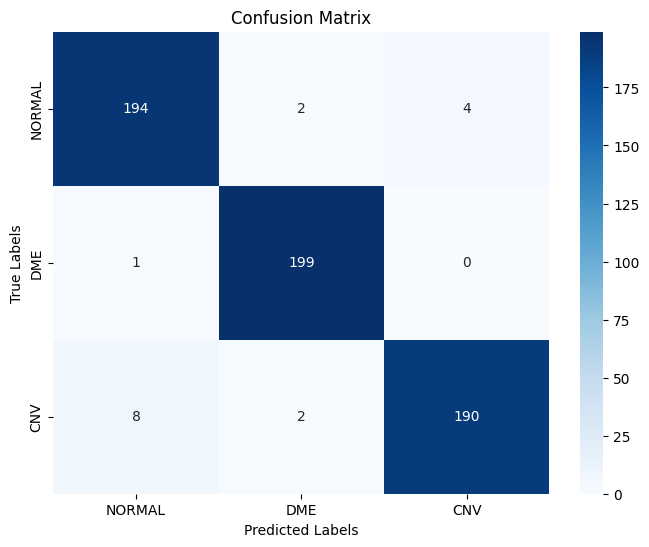

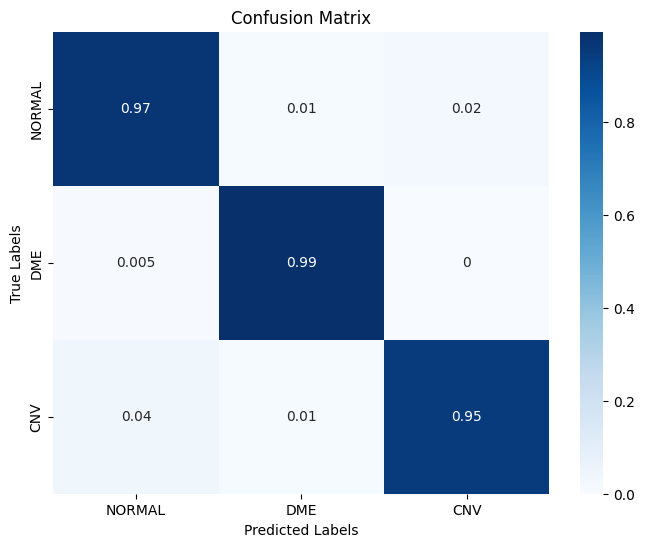

True

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'])
conf_matrix_norm = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'], normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_image = np.array(heatmap.get_figure().canvas.renderer.buffer_rgba())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap_norm = sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_norm_image = np.array(heatmap_norm.get_figure().canvas.renderer.buffer_rgba())

cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix.jpeg', heatmap_image)
cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix_norm.jpeg', heatmap_norm_image)

In [ ]:
#@title Inference time calculation on the test data

In [33]:
import os
import datetime
import numpy as np
import cv2
!pip install ultralytics
from ultralytics import YOLO
from joblib import load

#import pickle
#import joblib
#Normal_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_NORMAL_18_60.joblib')
#DME_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_DME_18_60.joblib')
#CNV_model = load('/content/drive/MyDrive/oct_classification/kermany_dataset/test16/dl_model_CNV_18_60.joblib')

Normal_model = dl_model_NORMAL
DME_model = dl_model_DME
CNV_model = dl_model_CNV

model_dict = [Normal_model, DME_model, CNV_model]
model_classification = YOLO('/content/runs/classify/train/weights/best.pt') # build from YAML and transfer weights


In [34]:
#Define an inference time function
def inference(img, model_dict, model_classification):
  start_time = datetime.datetime.now()

  # your functions
  #data transforming using dictionary learning
  img = np.asarray(img) # convert it to ndarray
  img = cv2.resize(img, (512, 512))
  img = img.reshape((1, 512 * 512))
  img = img.astype(float)
  img /= 255.0

  label_conf = []
  label_predict = []
  for dict_num in model_dict:
    img_tr = dict_num.transform(img)
    img_tr2d = img_tr.reshape((10, 10))*255
    img_tr2d = img_tr2d.astype(np.uint8)

    #predict the class using YOLOv8
    classification_result = model_classification(img_tr2d)
    label_conf.append(classification_result[0].probs.top1conf)
    label_predict.append(classification_result[0].names[classification_result[0].probs.top1])

  index = label_conf.index(max(label_conf))
  final_label = label_predict[index]




  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  #print(f"{elapsed_time=}")

  return final_label, elapsed_time


In [35]:
#Images importing
from PIL import Image

img_list = []
dataset_folder = '/content/oct_my_dataset/test/'  # Replace with your source folder path
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_open = os.listdir(source_folder)

  # Open each image file from the source folder
  for img_name in files_to_open[:10]:
    img_dir = os.path.join(source_folder, img_name)
    image = Image.open(img_dir) # This returns an image object
    img_list.append(image)

In [36]:
#Inference time calculation

label_list = []
inference_list = []
for img in img_list:
  label, time = inference(img, model_dict, model_classification)
  label_list.append(label)
  inference_list.append(time)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.82, NORMAL 0.16, CNV 0.01, 15.3ms
Speed: 8.8ms preprocess, 15.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)

0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 29.2ms
Speed: 6.8ms preprocess, 29.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, NORMAL 0.02, DME 0.00, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.95, DME 0.04, CNV 0.01, 26.1ms
Speed: 16.9ms preprocess, 26.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.67, CNV 0.30, NORMAL 0.03, 33.4ms
Speed: 17.2ms preprocess, 33.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 14.4ms
Speed: 2.4ms preprocess, 14.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.55, CNV 0.32, NORMAL 0.12, 13.3ms
Speed: 9.3ms preprocess, 13.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 8.5ms
Speed: 5.6ms preprocess, 8.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.5ms
Speed: 2.4ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.65, NORMAL 0.35, CNV 0.00, 11.8ms
Speed: 2.5ms preprocess, 11.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 5.9ms
Speed: 3.8ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.87, CNV 0.12, DME 0.01, 10.5ms
Speed: 5.2ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 11.3ms
Speed: 4.0ms preprocess, 11.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.03, DME 0.00, 18.5ms
Speed: 2.5ms preprocess, 18.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.96, CNV 0.04, DME 0.00, 14.8ms
Speed: 7.1ms preprocess, 14.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.8ms
Speed: 2.5ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.03, DME 0.00, 5.6ms
Speed: 6.5ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.3ms
Speed: 2.6ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 14.6ms
Speed: 3.6ms preprocess, 14.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.00, 20.4ms
Speed: 6.1ms preprocess, 20.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 31.4ms
Speed: 11.0ms preprocess, 31.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 26.5ms
Speed: 2.4ms preprocess, 26.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, NORMAL 0.02, DME 0.00, 45.2ms
Speed: 2.9ms preprocess, 45.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 31.8ms
Speed: 8.1ms preprocess, 31.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 11.2ms
Speed: 3.9ms preprocess, 11.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, NORMAL 0.02, DME 0.00, 6.2ms
Speed: 9.2ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 10.3ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 15.1ms
Speed: 2.6ms preprocess, 15.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.98, CNV 0.01, DME 0.01, 13.0ms
Speed: 4.9ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.87, NORMAL 0.10, DME 0.04, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.79, CNV 0.21, DME 0.00, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 6.9ms
Speed: 4.2ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.87, NORMAL 0.12, DME 0.01, 17.9ms
Speed: 2.5ms preprocess, 17.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.67, NORMAL 0.28, DME 0.04, 8.1ms
Speed: 6.0ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.00, DME 0.00, 5.6ms
Speed: 2.7ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.90, CNV 0.10, DME 0.00, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 7.3ms
Speed: 6.1ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, NORMAL 0.03, DME 0.00, 5.7ms
Speed: 2.3ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 11.8ms
Speed: 8.7ms preprocess, 11.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.92, NORMAL 0.08, CNV 0.01, 9.1ms
Speed: 7.4ms preprocess, 9.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 16.3ms
Speed: 6.8ms preprocess, 16.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.9ms
Speed: 2.0ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 14.4ms
Speed: 3.8ms preprocess, 14.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.62, DME 0.27, CNV 0.11, 12.7ms
Speed: 2.2ms preprocess, 12.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.1ms
Speed: 4.9ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 11.5ms
Speed: 2.9ms preprocess, 11.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 14.2ms
Speed: 3.3ms preprocess, 14.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.94, DME 0.05, CNV 0.01, 5.9ms
Speed: 8.9ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 6.6ms
Speed: 8.3ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.95, NORMAL 0.03, DME 0.02, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.96, NORMAL 0.03, CNV 0.01, 5.6ms
Speed: 3.3ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.87, NORMAL 0.13, DME 0.00, 5.6ms
Speed: 3.0ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.89, DME 0.11, CNV 0.00, 6.3ms
Speed: 4.5ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 5.7ms
Speed: 4.9ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 15.1ms
Speed: 6.7ms preprocess, 15.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 6.5ms
Speed: 3.7ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.72, CNV 0.28, DME 0.00, 5.6ms
Speed: 3.4ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.7ms
Speed: 2.3ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 6.0ms
Speed: 2.4ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.97, CNV 0.03, DME 0.00, 8.2ms
Speed: 3.3ms preprocess, 8.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.83, NORMAL 0.17, CNV 0.01, 9.0ms
Speed: 3.3ms preprocess, 9.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.59, DME 0.30, NORMAL 0.11, 12.6ms
Speed: 4.7ms preprocess, 12.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.7ms
Speed: 3.0ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 5.7ms
Speed: 3.6ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.85, NORMAL 0.14, DME 0.00, 5.7ms
Speed: 8.7ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 6.0ms
Speed: 5.1ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.70, CNV 0.30, NORMAL 0.00, 6.3ms
Speed: 2.5ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, DME 0.01, NORMAL 0.00, 6.7ms
Speed: 3.6ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.00, CNV 0.00, 7.2ms
Speed: 3.6ms preprocess, 7.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 5.7ms
Speed: 4.9ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.71, NORMAL 0.28, DME 0.00, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 11.5ms
Speed: 4.3ms preprocess, 11.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.90, NORMAL 0.10, DME 0.00, 24.8ms
Speed: 2.3ms preprocess, 24.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.73, NORMAL 0.23, DME 0.05, 12.3ms
Speed: 2.2ms preprocess, 12.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.9ms
Speed: 6.4ms preprocess, 5.9ms inference, 0.2ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.56, NORMAL 0.42, DME 0.02, 14.4ms
Speed: 2.3ms preprocess, 14.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.40, DME 0.31, CNV 0.28, 10.4ms
Speed: 10.4ms preprocess, 10.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 11.2ms
Speed: 6.1ms preprocess, 11.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 10.1ms
Speed: 4.0ms preprocess, 10.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [37]:
#print the inference time
inference_mean = np.mean(inference_list)
print(f"{inference_mean=}")

inference_mean=datetime.timedelta(seconds=1, microseconds=771753)


In [ ]:
#@title Save folders and experiments on the Google Drive

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dictl_dataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/atoms')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/runs')

In [ ]:
#copy folders to google drive
shutil.copytree("/content/oct_my_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test17/oct_my_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_dataset'

In [ ]:
shutil.copytree("/content/oct_my_dictl_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test17/oct_my_dictl_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test15/oct_my_dictl_dataset'

In [38]:
shutil.copytree("/content/oct_my_trdataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test17/oct_my_trdataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test17/oct_my_trdataset'

In [39]:
shutil.copytree("/content/atoms", "/content/drive/MyDrive/oct_classification/kermany_dataset/test17/atoms")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test17/atoms'

In [40]:
shutil.copytree("/content/runs", "/content/drive/MyDrive/oct_classification/kermany_dataset/test17/runs")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test17/runs'

In [ ]:
#@title repeatability and stablity test for dictionary learning

In [ ]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning
from joblib import dump, load
from scipy.stats import ttest_rel

In [ ]:
# @title Selection of some images as the dataset for dictionary learning (open and store)

In [ ]:
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [ ]:
!mkdir '/content/oct_my_dictl_dataset'


In [ ]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [ ]:
# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset/train/'
#dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
#for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:20]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")






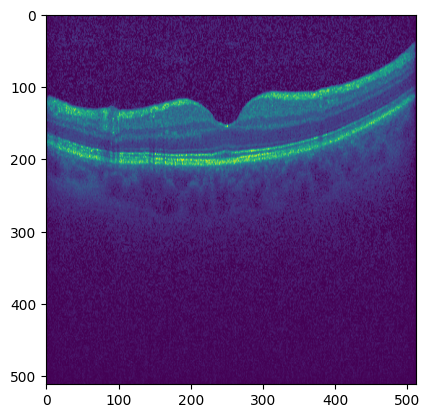

In [ ]:
plt.imshow(images[2])

In [ ]:
#@title dictionary Learning Processs

In [ ]:
# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [ ]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
#X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]
#X_NORMAL, X_DME, X_CNV = X[:10], X[10:20], X[20:30]
X_NORMAL, X_DME, X_CNV = X[:20], X[20:40], X[40:60]

In [ ]:
# Create a dictionary learning model

def dictionary (X, n_components, alpha, batch_size, n_iter):

  dl_model = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

  #Normalized data
  X -= np.mean(X, axis=0)
  X /= np.std(X, axis=0)

  # Fit the model to the flattened image data
  dl_model.fit(X)
  ATOMS = dl_model.components_
  X_tr = dl_model.transform(X)



  return dl_model, ATOMS, X_tr






In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_NORMAL = []
atoms_NORMAL = []
X_NORMAL_coef = []
t_statistic = []
p_value = []

for i in range(5):
  model, atoms, coef = dictionary (X_NORMAL, n_components, alpha, batch_size, n_iter)
  models_NORMAL.append(model)
  atoms_NORMAL.append(atoms)
  X_NORMAL_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_NORMAL_coef[i] == 0)}')
  X_hat = X_NORMAL_coef[i] @ atoms_NORMAL[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_NORMAL' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_NORMAL_coef[i-1].flatten(), X_NORMAL_coef[i].flatten())
    t_statistic.append(t_test)
    p_value.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic):.4f} p-value: {np.mean(p_value):.4f}')
if np.mean(p_value) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.356
reconstruction MSE: 1.0975606481650123e-12


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3675
reconstruction MSE: 1.680078815493546e-12
T-statistic: 0.7904
P-value: 0.4294
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.432
reconstruction MSE: 1.4857492335823559e-12
T-statistic: -0.0040
P-value: 0.9968
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.4385
reconstruction MSE: 1.2531767543310238e-12
T-statistic: -0.3730
P-value: 0.7092
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.423
reconstruction MSE: 2.5093192432987736e-12
T-statistic: 0.1034
P-value: 0.9176
There is no significant difference in means.


In [ ]:
# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic):.4f} p-value: {np.mean(p_value):.4f}')
if np.mean(p_value) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')


t-statistic value: 0.1292 p-value: 0.7632
There is no significant difference in means.


In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_DME = []
atoms_DME = []
X_DME_coef = []
t_statistic_DME = []
p_value_DME = []

for i in range(5):
  model, atoms, coef = dictionary (X_DME, n_components, alpha, batch_size, n_iter)
  models_DME.append(model)
  atoms_DME.append(atoms)
  X_DME_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_DME_coef[i] == 0)}')
  X_hat = X_DME_coef[i] @ atoms_DME[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_DME' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_DME_coef[i-1].flatten(), X_DME_coef[i].flatten())
    t_statistic_DME.append(t_test)
    p_value_DME.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic_DME):.4f} p-value: {np.mean(p_value_DME):.4f}')
if np.mean(p_value_DME) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.443
reconstruction MSE: 2.282760673803931e-12


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3635
reconstruction MSE: 1.643488989483313e-12
T-statistic: 0.2211
P-value: 0.8250
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.4505
reconstruction MSE: 2.215492039411364e-12
T-statistic: 0.7084
P-value: 0.4788
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.464
reconstruction MSE: 1.6052818009806804e-12
T-statistic: -1.7034
P-value: 0.0886
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.396
reconstruction MSE: 8.967191896572445e-13
T-statistic: 1.4680
P-value: 0.1423
There is no significant difference in means.
t-statistic value: 0.1735 p-value: 0.3837
There is no significant difference in means.


In [ ]:
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

models_CNV = []
atoms_CNV = []
X_CNV_coef = []
t_statistic_CNV = []
p_value_CNV = []

for i in range(5):
  model, atoms, coef = dictionary (X_CNV, n_components, alpha, batch_size, n_iter)
  models_CNV.append(model)
  atoms_CNV.append(atoms)
  X_CNV_coef.append(coef)


  #Feature extraction percent
  print(f'sparsity percent: {np.mean(X_CNV_coef[i] == 0)}')
  X_hat = X_CNV_coef[i] @ atoms_CNV[i]
  print(f'reconstruction MSE: {np.mean(np.sum((X_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1))}')

  #save the model
  save_dir = os.path.join('/content/dl_model_CNV' + f'{i+1}' + '.joblib')
  dump(model, save_dir)



  if i >= 1:
    # Perform a paired t-test on the flattened observations
    t_test, p = ttest_rel(X_CNV_coef[i-1].flatten(), X_CNV_coef[i].flatten())
    t_statistic_CNV.append(t_test)
    p_value_CNV.append(p)

    # Print the results
    print(f'T-statistic: {t_test:.4f}')
    print(f'P-value: {p:.4f}')

    # Interpret the results
    if p < 0.05:
        print('The difference in means is statistically significant.')
    else:
        print('There is no significant difference in means.')


# The average values for repeatability of the learned dictionary
print(f't-statistic value: {np.mean(t_statistic_CNV):.4f} p-value: {np.mean(p_value_CNV):.4f}')
if np.mean(p_value_CNV) < 0.05:
        print('The difference in means is statistically significant.')
else:
        print('There is no significant difference in means.')



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.3645
reconstruction MSE: 8.996091798394e-13


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.42
reconstruction MSE: 1.0401330881495724e-12
T-statistic: -0.2542
P-value: 0.7994
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.428
reconstruction MSE: 2.147583410878661e-12
T-statistic: 0.0845
P-value: 0.9326
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.444
reconstruction MSE: 2.371668015001676e-12
T-statistic: -0.3083
P-value: 0.7579
There is no significant difference in means.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


sparsity percent: 0.403
reconstruction MSE: 2.4277534367461093e-12
T-statistic: 0.2232
P-value: 0.8234
There is no significant difference in means.
t-statistic value: -0.0637 p-value: 0.8283
There is no significant difference in means.


In [ ]:
np.shape(X_NORMAL_coef)

(5, 20, 100)

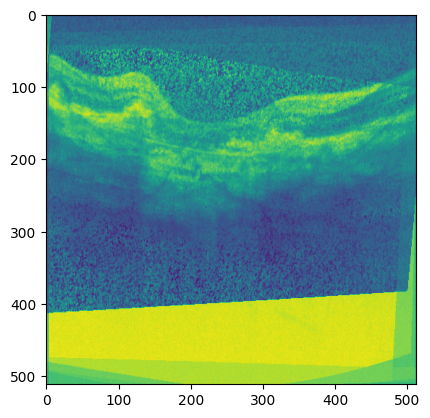

In [ ]:
plt.imshow(atoms_CNV[0][0].reshape(512,512))

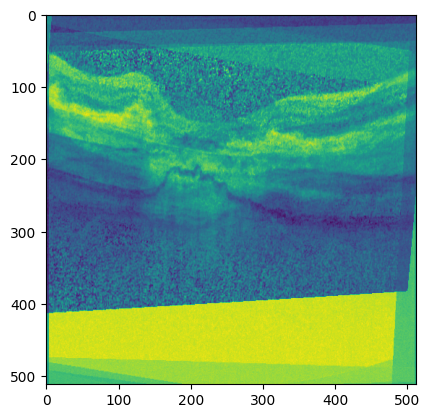

In [ ]:
plt.imshow(atoms_CNV[1][0].reshape(512,512))

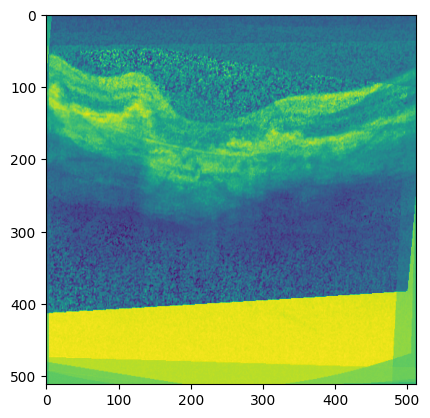

In [ ]:
plt.imshow(atoms_CNV[2][0].reshape(512,512))

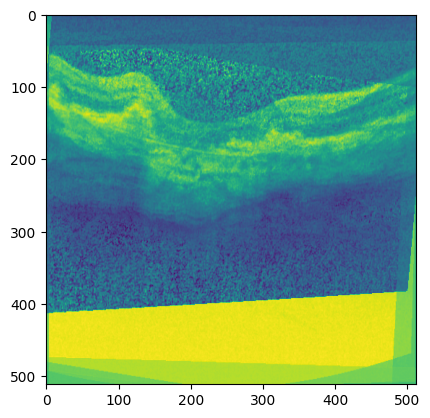

In [ ]:
plt.imshow(atoms_CNV[3][0].reshape(512,512))

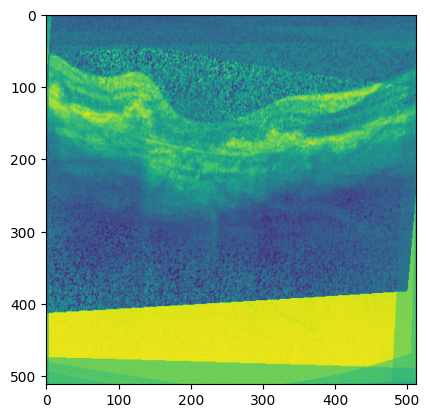

In [ ]:
plt.imshow(atoms_CNV[4][0].reshape(512,512))

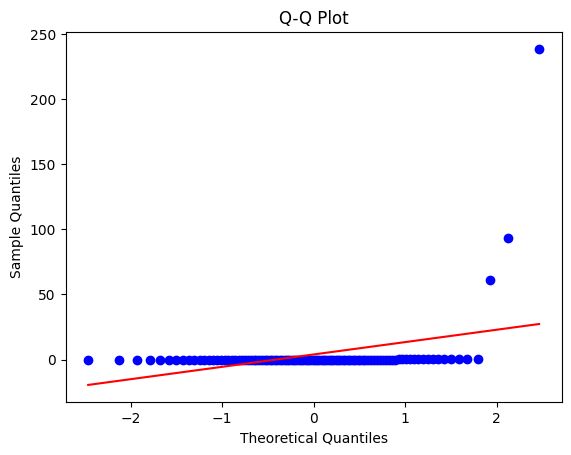

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Generate some example data (replace this with your actual data)
data = X_NORMAL_coef[5]

# Create Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [ ]:
#@title Dictlearn tests - incomplete

In [ ]:
!git clone https://github.com/permfl/dictlearn.git /content/dictlearn

Cloning into '/content/dictlearn'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 152 (delta 1), reused 2 (delta 0), pack-reused 145
Receiving objects: 100% (152/152), 2.11 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!pip install dictlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
%cd /content/dictlearn
!pip install --file requirements.txt

/content/dictlearn

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --file


In [ ]:
!python setup.py install

Installing dictlearn...
Compiling /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx because it changed.
Compiling /content/dictlearn/dictlearn/_dictlearn/hessian.pyx because it changed.
[1/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
/usr/local/lib/python3.10/dist-packag

In [ ]:
import dictlearn as dl
dictionary = dl.dct_dict(256, 8)

AttributeError: module 'dictlearn' has no attribute 'dct_dict'

In [ ]:
import dictlearn as dl
dl.
image = dl.imread('examples/images/house.png')
image_patches = dl.Patches(image, 8)
matrix = image_patches.patches
matrix.shape

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl

denoise = dl.Denoise('noisy_image.png')
denoised_image = denoise.train().denoise()
plt.imshow(denoised_image)
plt.show()

AttributeError: module 'dictlearn' has no attribute 'Denoise'

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip show dictlearn

Name: dictlearn
Version: 0.2.1
Summary: Dictionary Learning Toolbox
Home-page: https://gitlab.com/unibuc/graphomaly/dictionary-learning
Author: Paul Irofti, Denis Ilie-Ablachim, Bogdan Dumitrescu
Author-email: graphomaly@fmi.unibuc.ro
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
print(dir(dl))
dl.kernels()

['DictionaryLearning', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_dictionary_learning', '_get_fit_handle', 'dictionary_learning', 'kernel_dictionary_learning', 'kernels', 'methods', 'online_dictionary_learning', 'sparse_encode']


In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl
dl.
inpainter = dl.inpaint('image.png', 'mask.png')
inpainted_image = inpainter.train().inpaint()

plt.subplot(121)
plt.imshow(inpainter.patches.image)
plt.title('Original')

plt.subplot(122)
plt.imshow(inpainted_image)
plt.title('Inpainted')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'inpaint'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('images/vessel.png')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True, n_init=3)
patch_size = (30, 30)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  300 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  400 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Part

In [ ]:
a = faces.images

In [ ]:
a.dtype

dtype('float32')

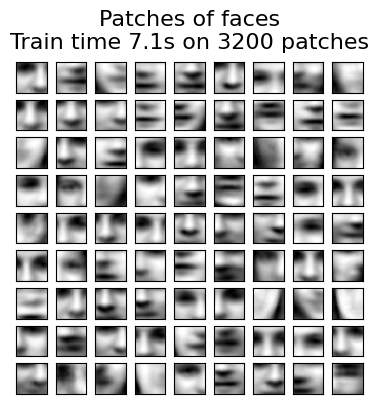

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()